b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


(271360, 8)
(278858, 3)
(1149780, 3)
[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]
(278858, 3)
[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.

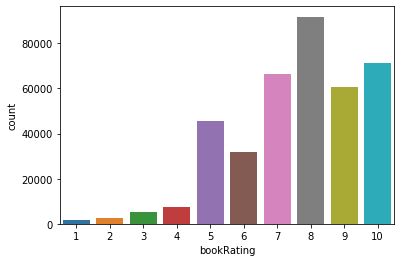

Following books are recommended
(278858, 3)
(68091, 3)
(52451, 3)
(449, 66574)
449 66574
The sparsity level of Book Crossing dataset is 99.99772184106935 %

Predicted rating for user 11676 -> item 0001056107: 2

Predicted rating for user 11676 -> item 0001056107: 1
User id should be a valid integer from this list :

   2033   2110   2276   4017   4385   5582   6242   6251   6543   6575
   7286   7346   8067   8245   8681   8890  10560  11676  11993  12538
  12824  12982  13552  13850  14422  15408  15418  16634  16795  16966
  17950  19085  21014  23768  23872  23902  25409  25601  25981  26535
  26544  26583  28591  28634  29259  30276  30511  30711  30735  30810
  31315  31556  31826  32773  33145  35433  35836  35857  35859  36299
  36554  36606  36609  36836  36907  37644  37712  37950  38023  38273
  38281  39281  39467  40889  40943  43246  43910  46398  47316  48025
  48494  49144  49889  51883  52199  52350  52584  52614  52917  53220
  55187  55490  55492  56271  56399  56447 

Dropdown(description='Select approach', options=('Item-based (correlation)', 'Item-based (cosine)', 'User-base…

In [4]:
#Import thư viện pandas numpy
import pandas as pd
import numpy as np
#Import Pylt để plot ảnh
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
#Import thư viện để sử dụng KNN
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os, sys
import re
import seaborn as sns

#Đọc dữ liệu từ file
books = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

#CHẠY
print (books.shape)
print (users.shape)
print (ratings.shape)

#CHẠY
#Show 1 số data point của book lúc đầu
books.head()

#Vì 3 cột cuối chỉ để sử dụng load ảnh, không cần thiết cho CF nên bỏ 3 cột cuối
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)

#1 số Data point sau khi xử lý
books.head()

#Kiểm tra type của từng column
books.dtypes

#Chỉnh để hiển thị full text
pd.set_option('display.max_colwidth', -1)

#TIỀN XỬ LÝ DỰ LIỆU

#CHẠY
#yearOfPublication phải mang kiểu int
#Kiểm tra unique value của cột này
books.yearOfPublication.unique()

#CHẠY
#Dựa vào kết quả trên, ta thấy đc rằng cột này có nhiều dữ liệu lỗi. Có tên NXB trong năm xuất bản
#Vài dữ liệu mang kiểu strinig
#Lọc ra những dữ liệu sai này
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

#CHẠY
#Xử lý dữ liệu lỗi
books.loc[books.ISBN == '0789466953','yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953','bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','bookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#CHẠY
#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','bookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#CHẠY
#Kiểm tra lại
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]
#corrections done

#CHẠY
#Tiếp tục lọc dữ liệu lỗi
books.loc[books.yearOfPublication == 'Gallimard',:]

books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"

#CHẠY
#Kiểm tra lại
books.loc[books.ISBN == '2070426769',:]
#corrections done

#Sửa lại type của yearOfPublication
books.yearOfPublication=pd.to_numeric(books.yearOfPublication, errors='coerce')

print (sorted(books['yearOfPublication'].unique()))
#Nhìn vào bảng trên, ta thấy được chúng ta đã chỉnh kiểu mọi data point thành kiểu int

#CHẠY
#Tuy nhiên, vài data point lại mang giá trị 0, và vì data set này được ra đời năm 2004 ==> Giả định rằng mọi năm sau năm 
#2006 là những năm ko đúng
books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication == 0),'yearOfPublication'] = np.NAN

#Thay thế giá trị NaNs thành giá trị có nghĩa
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace=True)

#Kiểm tra lại
books.yearOfPublication.isnull().sum()
#Ko còn giá trị NaN nào nữa


#Chuyển kiểu thành int32
books.yearOfPublication = books.yearOfPublication.astype(np.int32)


#Kiểm tra cột Publisher
books.loc[books.publisher.isnull(),:]
#Phát hiện 2 giá trị null

books.loc[(books.bookTitle == 'Tyrant Moon'),:]

books.loc[(books.bookTitle == 'Finders Keepers'),:]

books.loc[(books.bookAuthor == 'Elaine Corvidae'),:]

books.loc[(books.bookAuthor == 'Linnea Sinclair'),:]

#Thay thế các giá null đó thành other
#since there is nothing in common to infer publisher for NaNs, replacing these with 'other
books.loc[(books.ISBN == '193169656X'),'publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'publisher'] = 'other'

print (users.shape)
users.head()

users.dtypes

users.userID.values


print (sorted(users.Age.unique()))
#Cột age có nhiều giá trị vô lý (<1 và >100 tuổi)

#Giả định các tuổi >90 hoặc nhỏ <5 đều là vô lý
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

#Thay giá trị nan thành giá trị có nghĩa
users.Age = users.Age.fillna(users.Age.mean())

#Chuyển age thành kiểu int32
users.Age = users.Age.astype(np.int32)


#Kiểm tra lại
print (sorted(users.Age.unique()))



#checking shape
ratings.shape


n_users = users.shape[0]
n_books = books.shape[0]
print (n_users * n_books)

#Xem vài hàng đầu của ratings
ratings.head(5)


ratings.bookRating.unique()

#Ratings chỉ có thể có book trong book dataset, trừ khi có sách mới đc add vào book dataset
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

print (ratings.shape)
print (ratings_new.shape)
#Loại bỏ những cột mà mã sách (ISBN) ko có trong dataset book


ratings = ratings[ratings.userID.isin(users.userID)]

print (ratings.shape)
print (ratings_new.shape)

print ("number of users: " + str(n_users))
print ("number of books: " + str(n_books))

#CHẠY
#Kiểm tra độ rải rác dataset
sparsity=1.0-len(ratings_new)/float(n_users*n_books)
print ('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')


ratings.bookRating.unique()

ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]

#checking shapes
print (ratings_new.shape)
print (ratings_explicit.shape)
print (ratings_implicit.shape)

#CHẠY
#Show độ phân bố rating của book
sns.countplot(data=ratings_explicit , x='bookRating')
plt.show()

#CHẠY
#Xây dựng 1 recommend đơn giản dựa trên độ popular của sách --> sách đc nhiều ng đánh giá cao nhất
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['bookRating'].sum())
top10 = ratings_count.sort_values('bookRating', ascending = False).head(10)
print ("Following books are recommended")
top10.merge(books, left_index = True, right_on = 'ISBN')



users_exp_ratings = users[users.userID.isin(ratings_explicit.userID)]
users_imp_ratings = users[users.userID.isin(ratings_implicit.userID)]

#checking shapes
print (users.shape)
print (users_exp_ratings.shape)
print (users_imp_ratings.shape)

#Collaborative Filtering Based Recommendation Systems

#CHẠY
#Vì cấu hình máy, tụi em giảm size của datasize --> Chỉ xét những user đã đánh giá hơn 100 sách và những sách có hơn 100 ratings
counts1 = ratings_explicit['userID'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts1[counts1 >= 100].index)]
counts = ratings_explicit['bookRating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['bookRating'].isin(counts[counts >= 100].index)]


#Tạo rating matrix
ratings_matrix = ratings_explicit.pivot(index='userID', columns='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

#Xuất hiện nhiều giá trị Nan ==> Phải thay thế những giá trị này bằng giá trị 0 (Có nghĩa là chưa có ratings)
ratings_matrix.fillna(0, inplace = True)
#Set kiểu là int32
ratings_matrix = ratings_matrix.astype(np.int32)


#checking first few rows
ratings_matrix.head(5)

#Kt lại độ rời rạc
sparsity=1.0-len(ratings_explicit)/float(users_exp_ratings.shape[0]*n_books)
print ('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

global metric,k
k=10
metric='cosine'


#User-based Recommendation System

#Hàm này tìm k similar users dựa trên user_id và rating matrix đang xét đến
def findksimilarusers(user_id, ratings, metric = metric, k=k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
            
    return similarities,indices

#Hàm predict User-user recom
def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) #similar users based on cosine similarity
    mean_rating = ratings.iloc[user_loc,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    #Nếu dataset cực kỳ rải rác, thì xử lý theo cách dưới
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))

    return prediction

predict_userbased(11676,'0001056107',ratings_matrix);

#Item-based Recommendation Systems

#Tìm k similar item

def findksimilaritems(item_id, ratings, metric=metric, k=k):
    similarities=[]
    indices=[]
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()

    return similarities,indices

similarities,indices=findksimilaritems('0001056107',ratings_matrix)



#Hàm predict dựa trên Item-based recomm
def predict_itembased(user_id, item_id, ratings, metric = metric, k=k):
    prediction= wtd_sum =0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilaritems(item_id, ratings) #similar users based on correlation coefficients
    sum_wt = np.sum(similarities)-1
    product=1
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == item_loc:
            continue;
        else:
            product = ratings.iloc[user_loc,indices.flatten()[i]] * (similarities[i])
            wtd_sum = wtd_sum + product                              
    prediction = int(round(wtd_sum/sum_wt))
    
    
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10

    print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))      
    
    return prediction

prediction = predict_itembased(11676,'0001056107',ratings_matrix)

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout


#Hàm này sử dụng 2 hàm trên để recommend item cho người dùng dựa trên cả 2 phương pháp: Item-based và user-based
#Recommendations được đưa ra nếu rating dự đoán của item là >=6, và người dùng chưa rate item này
def recommendItem(user_id, ratings, metric=metric):    
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        print ("User id should be a valid integer from this list :\n\n {} ".format(re.sub('[\[\]]', '', np.array_str(ratings_matrix.index.values))))
    else:    
        ids = ['Item-based (correlation)','Item-based (cosine)','User-based (correlation)','User-based (cosine)']
        select = widgets.Dropdown(options=ids, value=ids[0],description='Select approach', width='1000px')
        def on_change(change):
            clear_output(wait=True)
            prediction = []            
            if change['type'] == 'change' and change['name'] == 'value':            
                if (select.value == 'Item-based (correlation)') | (select.value == 'User-based (correlation)') :
                    metric = 'correlation'
                else:                       
                    metric = 'cosine'   
                with suppress_stdout():
                    if (select.value == 'Item-based (correlation)') | (select.value == 'Item-based (cosine)'):
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_itembased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:                    
                                prediction.append(-1) #for already rated items
                    else:
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_userbased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:                    
                                prediction.append(-1) #for already rated items
                prediction = pd.Series(prediction)
                prediction = prediction.sort_values(ascending=False)
                recommended = prediction[:10]
                print ("As per {0} approach....Following books are recommended...".format(select.value))
                for i in range(len(recommended)):
                     print ("{0}. {1}".format(i+1,books.bookTitle[recommended.index[i]].encode('utf-8')))                        
        select.observe(on_change)
        display(select)

#CHẠY
#checking for incorrect entries
recommendItem(999999,ratings_matrix)

recommendItem(4385, ratings_matrix)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

df = pd.merge(books, ratings, on='ISBN', how='inner')
reader = pd.read_csv(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df[['userID', 'ISBN', 'bookRating']], reader)
trainSet, testSet = train_test_split(data, test_size=.25, random_state=0)
algo = SVD(random_state=0)
algo.fit(trainSet)
predictions = algo.test(testSet)

def MAE(predictions):
        return accuracy_score.mae(predictions, verbose=False)
def RMSE(predictions):
        return accuracy_score.rmse(predictions, verbose=False)
    
print("RMSE: ", RMSE(predictions))
print("MAE: ", MAE(predictions))